# Class Activity 3 [30 minutes]: normal-gamma toy model 

Last we left out intrepid heros, we desired samples from  

|The Full (Joint) Posterior Distribuition||$\quad\quad\;\;$Full Conditional Distributions
|-|:-:|-|
|$$p(\theta,\phi|x) \color{gray}{= p(\theta,\phi|x,\theta_0,\tau,\alpha,\beta)}\quad\quad\quad$$|But had only derived |$$\scriptsize
\begin{align*}
p(\theta|x,\theta_0,\tau, \phi) &={} \text{N}\left(\frac{\left(\tau \theta_0+\phi\sum_{i=1}^{n}x_{i}\right)}{(\tau+n\phi)}, \sigma^{-2}=\tau+n\phi \right)\\
p(\phi|x, \alpha, \beta, \theta) &={} \text{Gamma}\left(\alpha+\frac{n}{2}, \beta+\frac{1}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 \right)
\end{align*}$$
|

**Alternatingly sample, back and fourth, between the two full conditionals, conditioning the sample draw for the current parameter on the last drawn value of the other parameter...**

| |
|:-|
|0. You'll need data... what's the data?
|1. You'll need ***actual parameters values*** to simulate data... what are $\theta_{true}$ and $\phi_{true}$?|
|2. You'll need to know your ***prior hyperparameters***... what are $\theta_0,\tau,\alpha,$ and $\beta$?|
|3. You'll need ***initial values*** from which to start the process... what are $\theta^{(0)}$ or $\phi^{(0)}$?|
|4. You'll need to sample from the ***full conditional distributions***... how to do that?|
|5. You'll need to visualize the $\theta^{(t)}$ and $\phi^{(t)}$ samples for $i = 1, \cdots T$... how to do that?|
|6. You'll need to summarise the $\theta^{(t)}$ and $\phi^{(t)}$ samples for $i = 1, \cdots T$... how to do that?|











# Class Activity 3: Solution [15 minutes]


# Gibbs Sampling: History [7 minutes]

- There is a [log-linear model](https://en.wikipedia.org/wiki/Log-linear_model) known as the 
[Boltzmann distribution](https://en.wikipedia.org/wiki/Boltzmann_distribution)... 
   - The Boltzmann distribution is also called a Gibbs distribution after a statistical physicist whose research frequently utilized and explored this model...
- In 1984 the Geman brothers figured out an algorithm to sample from the Boltzmann distribution that had analogy to a statistical physics processes analyzed by Gibbs, so they named their sampler after Gibbs...
    
- In 1990 [my first advisor from 2005-2007] Alan Gelfand introduced the ***Gibbs sampler*** algorithm as a general tool for Bayesian posterior analysis... 

***Gibbs sampling*** initially dominated Bayesian posterior analysis; but, the strong sequential dependence of ***Gibbs sampling*** quickly suffers a prohibitive "curse of dimensionality" limiting its application to low dimentional parameter spaces. ***Hamiltonian Monte Carlo*** (***HMC***) greatly reduces this effect for ***continuous*** distributions, so ***Gibbs sampling*** is now typically limited to ***discrete*** contexts (often in conjuction with ***Metropolis-Hastings***) where ***HMC*** can't be used.



# Gibbs Sampling: Algorithm [15 minutes]

**The Gibbs Sampler is a simple algorithm...<br>cyclically sampling through Full Conditional Distributions<br> produces samples from the corresponding Full (Joint) Posterior Distribution**<br>just as you've done above for the class activity...

<table><tr><th></th><th></th></tr><tr><td>

***Gibbs sampling***: cycle through ***full conditionals***
    
\begin{align*}
1. &\;{} p(\theta_1^{(t)}|\theta_q^{(t-1)},\cdots,\theta_2^{(t-1)},x)\\
2. &\;{} p(\theta_2^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_3^{(t-1)}, \theta_1^{(t)}, x)\\
3. &\;{} p(\theta_3^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_4^{(t-1)}, \theta_2^{(t)}, \theta_1^{(t)}, x)\\
4. &\;{} p(\theta_4^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_5^{(t-1)}, \theta_3^{(t)}, \theta_2^{(t)},\theta_1^{(t)}, x)\\
\vdots\;& {} \\
q. &\;{} p(\theta_q^{(t)}|\theta_{q-1}^{(t)}, \cdots, \theta_1^{(t)}, x)\\
&\;{} \text{completes one full cycle; return to 1...}    
\end{align*}


</td>
<td>

This is NOT the chain rule... $$\require{cancel}\cancel{p(\theta_1^{(t)}|x)p(\theta_2^{(t)}| \theta_1^{(t)}, x)\cdots p(\theta_q^{(t)}|\theta_{q-1}^{(t)},\cdots, \theta_2^{(t)}, \theta_1^{(t)}, x)}$$

This is a ***Markov process*** for (vector) $\theta$ since $\theta^{(t)}$ depends only on $\theta^{(t-1)}$.

The ***Gibbs sampling*** ***Markov process*** will converge to a<br>***stationary distribution*** which will be the ***posterior distribution*** $p(\theta |  x)$

The samples from ***Gibbs sampling*** are a ***Markov Chain*** of sequentially (***Markov***) dependent samples from the ***stationary distribution*** of the ***Markov process*** which will be the ***posterior distribution*** $p(\theta |  x)$

</td>
</tr>
    
</table>





# Markov Chain Monte Carlo (MCMC): Idea [13 minutes] 

Bayesian posterior analysis is based upon **expectation**$\equiv$**integral** estimation. 

**Monte Carlo integration** is used to estimate the ***posterior mean*** 

$$E[\theta|x] = \int \theta p(\theta|x) d\theta \quad \text{ with } \quad \frac{1}{T}\sum_{t=1}^T \theta^{(t)}$$

and determine a ***95% Bayesian credible interval*** by solving for the interval bounds  

$$0.95 = \int 1_{[a,b]}(\theta) p(\theta|x) d\theta \quad \text{ with } \quad \underset{\text{where $\theta_{(t)}$ is the $t^{th}$ rank ordered posterior sample}}{a=\theta_{(\lfloor T\times0.025\rfloor)} \text{ and } b=\theta_{(\lceil T\times0.975\rceil)}}$$


***Gibbs sampling*** <span style="color:Gray;">though no ***chain rule*** decomposition of ***full (joint) posterior distributions*** $p(\theta|x)$</span>
samples (sequentially ***Markov*** dependent) ***Markov chains*** from ***full (joint) posterior distribution*** $p(\theta|x)$. <u>The ***Markov chain*** are then used for ***Markov Chain Monte Carlo (MCMC) integration***.</u>




# MCMC Bayesian Inference: Credible Intervals [5 minutes]


In [ ]:
# MCMC estimate posterior means / re-emphsize credible intervals from initial problem

# `PyMC`: Probabilistic Programming [15 minutes]

- ***Hamiltonian Monte Carlo*** (***HMC***) and ***Metropolis-Hastings*** (***M-H***)<br>were mentioned when introducing ***Giggs sampling***...
- Without yet know what these are, we can use them with `PyMC`

In [46]:
import pymc as pm; from scipy import stats; x = stats.norm().rvs(10)
normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model:
    theta = pm.Normal("theta", mu=0, sigma=10)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=x)

which specifies...

\begin{align*}
p(\theta,\phi|x) &\propto{} p(\theta,\phi,x) = \overset{N(\theta, \phi)}{p(x|\theta)}\overset{N(\theta_0, \tau)}{p(\theta)}\overset{\text{Gamma}(\alpha,\beta)}{p(\phi)\quad\quad}  (\theta \perp\!\!\perp \phi) \leftarrow \text{priors} \\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \phi^{\alpha -1}e^{-\beta \phi}\\
\end{align*}

# `PyMC`: Posterior Sampling  [5 minutes]

- ***Hamiltonian Monte Carlo*** (***HMC***) and ***Metropolis-Hastings*** (***M-H***) with `PyMC`
    - ***Gibbs sampling*** is not even an option for ***continuous variables*** in `PyMC`...

In [47]:
with normal_gamma_toy_model:
    idata_HMC = pm.sample() # default is the NUTS implementation of HMC

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, phi]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


In [207]:
with normal_gamma_toy_model:
    MH = pm.Metropolis([theta, phi], S=np.array([0.1]), tune=False, tune_interval=0)
    idata_MH = pm.sample(step=MH) # force MH

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [theta]
>Metropolis: [phi]


Sampling 4 chains for 0 tune and 2_000 draw iterations (0 + 8_000 draws total) took 0 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


# `PyMC`: Traceplot "Convergence" Checks  [10 minutes]

|Do MCMC chains with different initial values seem to agree?|[***Warm-up periods*** are discared]|
|-|-|
|$M$ split chains of $N$ samples created from $M/2$ chains halved in the middle with and $\text{Split-}\hat R$ statists are [calculated](https://arxiv.org/abs/1903.08008): values of $1$ mean indistinguishable chains while values of $>1.05$ fail the similarity test<br><br>$\text{Split-}\hat R$ is just an ANOVA style comparision of<br>"within chains" variability versus "between chains" variability |$$ \text{Split-}\hat R = \sqrt{\frac{\frac{N-1}{N}W +  \overbrace{\frac{1}{M-1}\sum_{m=1}^M (\overline{\theta^{(m,\cdot)}} - \overline{\theta^{(\cdot,\cdot)}})^2}^{\text{between chain variance}} }{\underbrace{\frac{1}{M}\sum_{m=1}^M \frac{1}{N-1}\sum_{n=1}^N (\theta^{(m,n)} - \overline{\theta^{(m,\cdot)}})^2}_{\text{$W$: within chain variance}}} } $$|

HMC Split-Rhats {'theta': 1.0006, 'phi': 1.001} | MH Split-Rhats {'theta': 1.0091, 'phi': 1.0329}


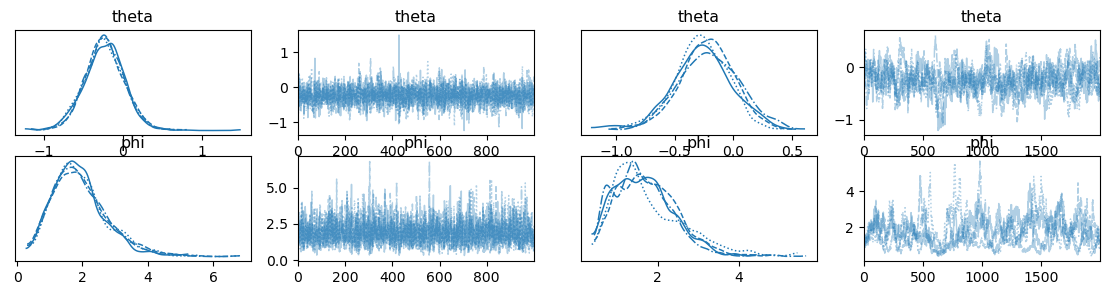

In [327]:
import arviz as az; import matplotlib.pyplot as plt; fig,ax = plt.subplots(2,4, figsize=(14,3))
az.plot_trace(idata_HMC, axes=ax[:2,:2]); az.plot_trace(idata_MH, axes=ax[:2,2:])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()}, end=' | '); print('MH Split-Rhats',{k: np.round(v.values,4) for k,v in az.rhat(idata_MH).items()})

# MCMC: A Closer Look [10 minutes]


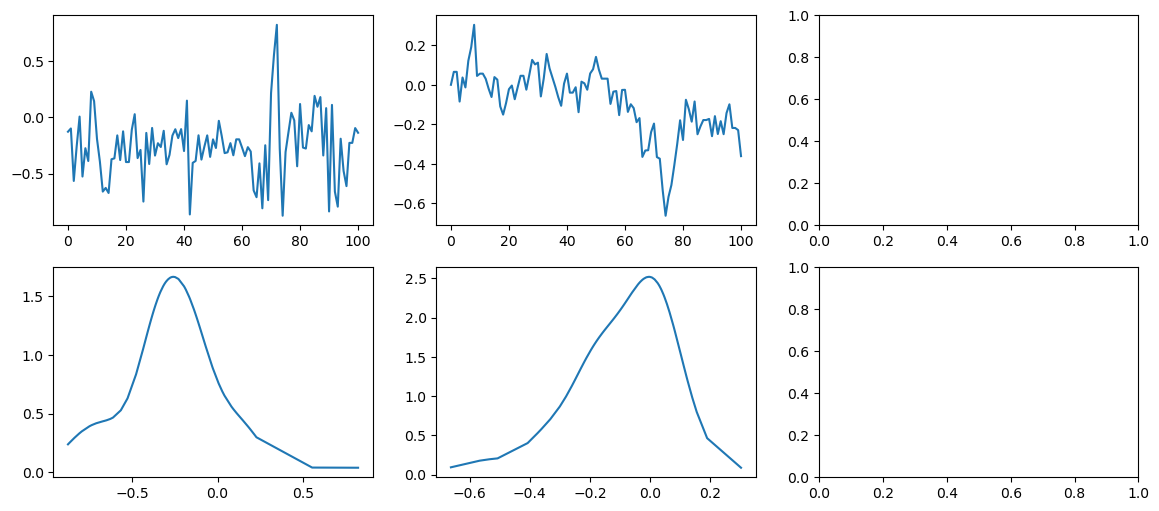

In [330]:
# update to also include the Gibbs sampling results as well which Leo creates
from scipy.stats import gaussian_kde; import matplotlib.pyplot as plt; fig,ax = plt.subplots(2,3, figsize=(14,6))
n_mcmc_samples = 100
mcmc_chain = idata_HMC.posterior["theta"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values; mcmc_chain_sorted = sorted(mcmc_chain)
ax[0,0].plot(mcmc_chain); ax[1,0].plot(mcmc_chain_sorted,gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted));
mcmc_chain = idata_MH.posterior["theta"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values; mcmc_chain_sorted = sorted(mcmc_chain)
ax[0,1].plot(mcmc_chain); ax[1,1].plot(mcmc_chain_sorted,gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted));

# MCMC: Autocorrelation (10 minutes)

Autocorrelation for HMC (MCMC) chain 0.2623453179000583
Autocorrelation for MH (MCMC) chain 0.9657962641077711


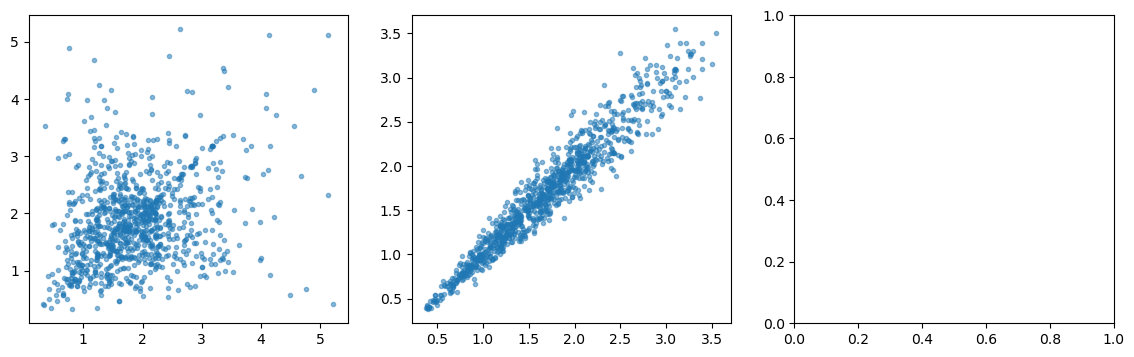

In [335]:
# include Gibbs sampling results as well which Leo creates
import numpy as np; import matplotlib.pyplot as plt; fig,ax = plt.subplots(1,3, figsize=(14,4))
max_mcmc_samples = 1000
mcmc_chain = idata_HMC.posterior["phi"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values; mcmc_chain_one_step_ahead = idata_HMC.posterior["phi"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values; ax[0].plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5)
print("Autocorrelation for HMC (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1])
mcmc_chain = idata_MH.posterior["phi"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values; mcmc_chain_one_step_ahead = idata_MH.posterior["phi"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values; ax[1].plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5);
print("Autocorrelation for MH (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1])

# MCMC: [Effective Sample Size](https://mc-stan.org/posterior/reference/ess_tail.html) [10 minutes]

`PyMC` labels $n_{\text{eff}} = \frac{n}{\sum_{t=-\infty}^\infty\rho_t} = \frac{n}{1+2\sum_{t=1}^\infty\rho_t}$ for order $t$ autocorrelations $\rho_t$ in the MCMC chains

<sup>`ess_bulk` while `ess_tail` is the same but after converting to binary sequences estimating 5% tail quantiles.</sup> 

In [274]:
import arviz as az; print("number of MCMC samples:", idata_HMC.posterior['phi'].shape[-1])
az.summary(idata_HMC, round_to=2) # https://python.arviz.org/en/stable/api/generated/arviz.ess.html

number of MCMC samples: 1000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,-0.23,0.25,-0.73,0.21,0.00,0.00,2885.47,2165.14,1.0
phi,1.93,0.83,0.55,3.45,0.02,0.01,2363.11,2152.27,1.0


In [267]:
print("number of MCMC samples:", idata_MH.posterior['phi'].shape[-1])
az.summary(idata_MH, round_to=2)

number of MCMC samples: 2000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,-0.24,0.25,-0.70,0.25,0.02,0.01,199.95,314.74,1.01
phi,1.71,0.77,0.51,3.09,0.07,0.05,98.90,210.06,1.03


# MCMC Bayesian Inference: Credible Intervals [5 minutes]

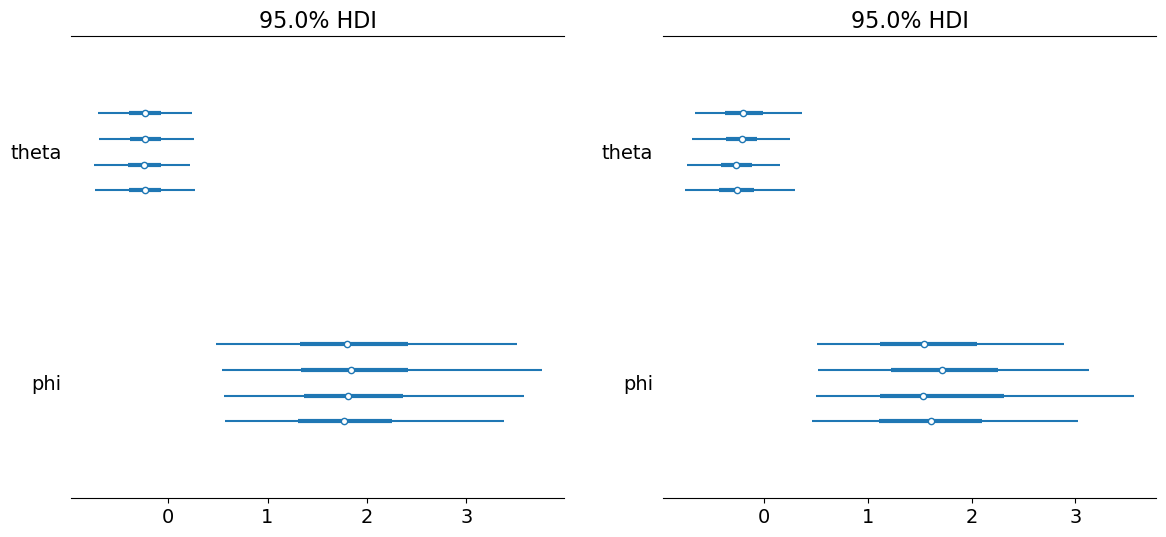

In [258]:
import arviz as az; import matplotlib.pyplot as plt; fig,ax = plt.subplots(1,2, figsize=(14,6))
az.plot_forest(idata_HMC, var_names=["theta","phi"], combined=False, hdi_prob=0.95, ax=ax[0]);
az.plot_forest(idata_MH, var_names=["theta","phi"], combined=False, hdi_prob=0.95, ax=ax[1]);

# Homework #3

0. Find data set on [kaggle](https://www.kaggle.com).
1. Provide posterior inference for a column of data with a `PyMC` ***normal-gamma specification***. 
2. Find a different column of data for which a ***normal-gamma specification*** isn't justified. 
3. Create a different `PyMC` specification that IS appropriate for this new data column:
    - here are your `PyMC` choices for [continuous distributions](https://www.pymc.io/projects/docs/en/stable/api/distributions/continuous.html)
    - here are your `PyMC` choices for [discrete distributions](https://www.pymc.io/projects/docs/en/stable/api/distributions/discrete.html)

### ...just make sure you've chosen a reasonable likelihood for your non-normal data and that the support of your priors makes sense for the parameters of your likelihood... 

4. Provide posterior inference for the parameters of your new specification given the column of non-normal data
using `PyMC` and provide an analysis of the MCMC chains. 